In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go

In [2]:
df = yf.download(tickers="BTC-USD", period = "max", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-17,29862.408203,30694.490234,29570.302734,30425.857422,30425.857422,29101473475
2022-05-18,30424.478516,30618.716797,28720.271484,28720.271484,28720.271484,31285268319
2022-05-19,28720.359375,30430.751953,28708.955078,30314.333984,30314.333984,33773447707


In [33]:
def create_leaderboard(lb_range = "1d"):
    """creates a leaderboard of the most performing coins in a time range 
    possible values for argument: one day 1d, five days 5d, one month 1mo, 2months 2mo, one quarter 3mo, one year 1y"""
    if (lb_range == "1d"):
        data_lb = yf.download(tickers=coins, period = "2d", interval = "15m")
    elif (lb_range == "5d"):
        data_lb = yf.download(tickers=coins, period = "2d", interval = "60m")
    else:
        data_lb = yf.download(tickers=coins, period = lb_range, interval = "1d")
    # creating empty df
    leaderboard = pd.DataFrame(columns = ["Percentage"])
    # appending percentage change in the timeframe for each coin into leaderboard df
    for coin in coins:
        prc = ((data_lb["Close", coin].iloc[-1] - data_lb["Close", coin].iloc[0]) / data_lb["Close", coin].iloc[-1]) * 100
        prc = np.round(prc, 2)
        leaderboard.loc[coin] = prc
    leaderboard.sort_values("Percentage", ascending=False, inplace=True)
    return data_lb, leaderboard

def get_linegraph(close_price, coin_name):
    fig = go.Scatter(
            x = close_price.index,
            y = close_price.values,
            name = coin_name,
        )
    #layout
    # fig = go.Figure(
    #     layout = go.Layout(
    #     autosize=False,
    #     # width=1000,
    #     # height=1000,
    #     xaxis= go.layout.XAxis(linecolor = 'black',
    #                           linewidth = 1,
    #                           mirror = True),

    #     yaxis= go.layout.YAxis(linecolor = 'black',
    #                           linewidth = 1,
    #                           mirror = True),
    #     margin=go.layout.Margin(
    #         l=50,
    #         r=50,
    #         b=100,
    #         t=100,
    #         pad = 4
    #     ))
    # )
    #scatter
    # fig = fig.add_trace(
    #     go.Scatter(
    #         x = close_price.index,
    #         y = close_price.values,
    #         name = coin_name,
    #     )
    # )
    fig.update_layout(
        title = coin_name,
        xaxis_title = 'Date',
        yaxis_title = f'Close Price',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )
    fig.update_yaxes(tickprefix='$')
    return fig


def get_top_bot(data_lb, leaderboard):
    """returns the linegraph figures for the two top and bottom performancers for the range specified in create_leaderboard() function """
    leaderboard.dropna(inplace=True)
    fig1 = get_linegraph(data_lb["Close", leaderboard.iloc[0].name], leaderboard.iloc[0].name)
    fig2 = get_linegraph(data_lb["Close", leaderboard.iloc[1].name], leaderboard.iloc[1].name)
    fig3 = get_linegraph(data_lb["Close", leaderboard.iloc[-2].name], leaderboard.iloc[-2].name)
    fig4 = get_linegraph(data_lb["Close", leaderboard.iloc[-1].name], leaderboard.iloc[-1].name)
    return fig1, fig2, fig3, fig4



def plot_leaderboard(leaderboard):
    """returns the table leaderboard figure"""
    leaderboard.dropna(inplace=True)
    fig = go.Figure(data=[go.Table(
    header=dict(values=["Coins", "Percentage change in closing price"],
                fill_color='lightgray',
                align='center'),
    cells=dict(values=[leaderboard.index, leaderboard],
               fill_color='white',
               align='center'))
    ])
    fig.update_layout(
        title = 'Leaderboard'
    )
    return fig

In [31]:
coins_bc4 = ['ADA-USD', 'ATOM-USD', 'AVAX-USD', 'AXS-USD', 'LUNA1-USD', 'MATIC-USD', 'BTC-USD', 'ETH-USD', 'SOL-USD', "LINK-USD"]
coins_added = ["DOGE-USD", "DOT-USD", "TRX-USD", "SHIB-USD", "LTC-USD", "XMR-USD", "FLOW-USD", "HNT-USD", "QNT-USD", "PAXG-USD"]
coins = coins_bc4 + coins_added

In [34]:
data_lb, leaderboard = create_leaderboard()
print("1")
top1, top2, bot1, bot2 = get_top_bot(data_lb, leaderboard)
print("2")
plt_coins = make_subplots(rows = 2, cols = 2, start_cell="bottom-left")
plt_coins.append_trace(top1, row = 1, col = 1)
plt_coins.append_trace(top2, row = 1, col = 2)
plt_coins.append_trace(bot1, row = 2, col = 1)
plt_coins.append_trace(bot2, row = 2, col = 2)
print("4")
plt_lb = plot_leaderboard(leaderboard)
type(plt_coins)

[*********************100%***********************]  20 of 20 completed
1


AttributeError: 'Scatter' object has no attribute 'update_layout'

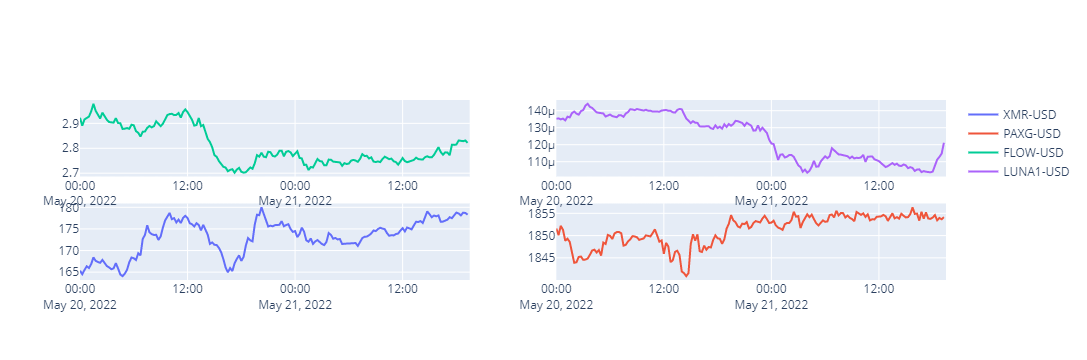

In [ ]:
plt_coins